In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df = pd.read_csv("data/emoji_cleanedv2_2.csv")
df.dropna(inplace=True)
df.head(5)

,Unnamed: 0,Tweet,Label
0,0,little throwback favourite person water wall,0
1,1,glam yesterday makeup using,7
2,2,democracy plaza wake stunning outcome nbc news,11
3,3,amp vilo walt disney magic kingdom,0
4,4,never galaxy far far away,2


In [80]:
 df.drop_duplicates(inplace=True)
print('after drop duplicates', df.shape)

after drop duplicates (49680, 3)


In [81]:
df['Tweet'] = df['Tweet'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
df.head(10)
df.shape

/var/folders/p6/9vz93_jn0w35pcs_knjyd76r0000gn/T/ipykernel_13567/3291048459.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Tweet'] = df['Tweet'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')


(49680, 3)

In [82]:
from sklearn.feature_extraction.text import CountVectorizer

c_vect = CountVectorizer()
X = c_vect.fit_transform(df['Tweet'])
#X_test = c_vect.fit_transform(X_test)
c_vect.get_feature_names_out()[110:120]

array(['2onehunnit', '2pm', '2season', '30', '300', '300mm', '308', '309',
       '30a', '30am'], dtype=object)

In [83]:
#X=df["Tweet"]
y=df["Label"]

In [84]:
from sklearn.model_selection import train_test_split

#X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101, stratify=y,shuffle = True)

In [85]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((42228, 33554), (42228,), (7452, 33554), (7452,))

In [86]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=42)
X_train,y_train = os.fit_resample(X_train, y_train)

In [87]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((181140, 33554), (181140,), (7452, 33554), (7452,))

In [88]:
from sklearn.naive_bayes import MultinomialNB


NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [89]:
import itertools


def plot_confusion_matrix(cm, classes, normalize=True,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Normalized confusion matrix


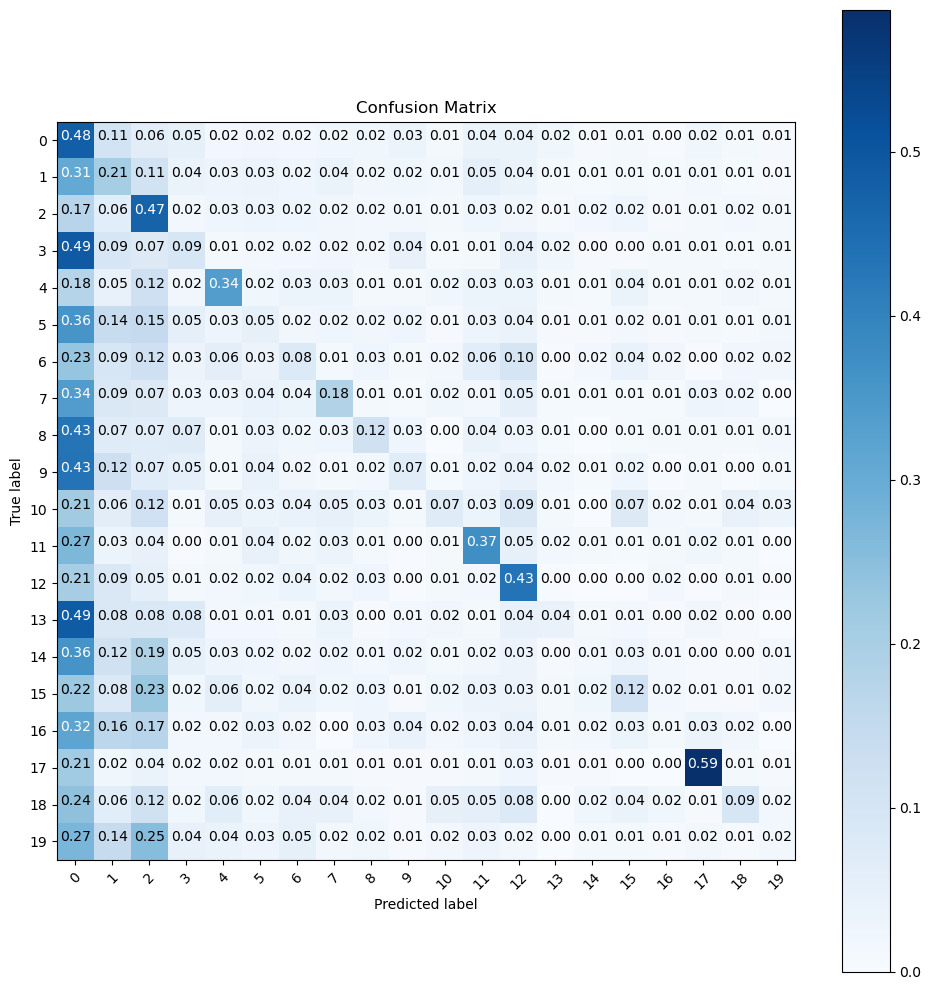

In [90]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)

plot_confusion_matrix(cm, [i for i in range(20)] ,title='Confusion Matrix', normalize=True)

In [91]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.31      0.48      0.37      1598
           1       0.21      0.21      0.21       787
           2       0.36      0.47      0.41       782
           3       0.14      0.09      0.11       432
           4       0.41      0.34      0.37       376
           5       0.08      0.05      0.06       346
           6       0.12      0.08      0.10       305
           7       0.23      0.18      0.20       282
           8       0.19      0.12      0.14       268
           9       0.10      0.07      0.08       249
          10       0.14      0.07      0.09       231
          11       0.26      0.37      0.31       225
          12       0.24      0.43      0.31       219
          13       0.09      0.04      0.05       201
          14       0.05      0.01      0.02       206
          15       0.14      0.12      0.13       186
          16       0.03      0.01      0.02       196
          17       0.51    